In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Graphs for basic visualization
nofStocks = len(os.listdir("Stocks"))

In [138]:
dataset = pd.read_csv('dataSet_differences.csv')
avgPerWord = pd.read_csv('effects_per_word_avg.csv', sep = ";", decimal = ",")
print(dataset.shape)
print("Effects per word shape : " + str(avgPerWord.shape[0]) + ", " +  str(avgPerWord.shape[1]))

#print(dataset.head(5))
print(avgPerWord.head(10))

(499, 9738)
Effects per word shape : 9721, 16
   Unnamed: 0      AAL      ACB      AMD       BA       GD     GOOG      LMT  \
0           0 -0.09452 -0.19895  0.34443  0.01660 -0.01114  0.07280  0.05115   
1           1 -0.09647 -0.17787  0.35727  0.01424 -0.01279  0.08166  0.05032   
2           2 -0.09944 -0.19219  0.34737  0.01829 -0.00099  0.07895  0.05474   
3           3 -0.08498 -0.16680  0.29682 -0.00292 -0.00672  0.06288  0.04870   
4           4 -0.12143 -0.15831  0.33795  0.00065 -0.02639  0.05049  0.02571   
5           5 -0.04975 -0.19086  0.40704  0.00321 -0.01320  0.04813  0.03617   
6           6 -0.10254 -0.18626  0.37386 -0.01303 -0.02066  0.06639  0.04661   
7           7 -0.10099 -0.05869  0.45734  0.05527  0.01523  0.14162  0.16202   
8           8 -0.07199 -0.18098  0.36182 -0.03203 -0.04478  0.06957  0.00190   
9           9 -0.09977 -0.17412  0.43535 -0.03914 -0.03255  0.06795  0.04362   

        MU      NOC      NRT      RTN      USO       ZN    ^GSPC Words  


In [130]:
tweetsWithDifferences = dataset.iloc[:, range(0, 3 + nofStocks)]
print(len(os.listdir("Stocks")))
print(tweetsWithDifferences.head(5))

14
   Month   Day    Year      AAL       ACB      AMD       BA       GD     GOOG  \
0    1.0  10.0  2018.0  4.90889  -8.36466  1.50502  2.45425  0.37118  0.26392   
1    1.0  11.0  2018.0  3.63347 -14.87179 -0.98847  2.46556  2.47190  1.51422   
2    1.0  12.0  2018.0 -0.83804  15.90361 -0.91514 -0.31230 -2.02289 -0.04455   
3    1.0  16.0  2018.0  0.31045   3.11850  2.26700  4.72909  1.06141  0.91107   
4    1.0  17.0  2018.0  0.30949   5.52419  2.38095 -3.09108 -0.34529 -0.19346   

       LMT       MU      NOC      NRT      RTN      USO       ZN    ^GSPC  
0  0.02417 -1.13138  0.63067  2.77136 -0.06719  0.15773  1.32743  0.70336  
1  1.54622 -0.02335  1.80908  1.46067  2.12568  1.33858  0.43668  0.67496  
2 -1.82603  0.25694 -0.82817 -1.32890 -0.87613 -0.85470 -4.34783 -0.35245  
3  1.43891  3.12209  1.59020  0.00000  0.64375  0.15674 -2.27273  0.94151  
4 -0.55545 -0.61002 -1.01100 -0.44893 -0.64978 -0.15649  0.93023 -0.16164  


In [131]:
tweetAverageEffects = pd.DataFrame(data=None, columns = tweetsWithDifferences.columns[3:3+nofStocks])

means = []
extremums = []
names = []
stds = []

for i in range(3, tweetsWithDifferences.shape[1]):
    stock = tweetsWithDifferences.iloc[:,i]
    extremums.append(stock.mad())
    means.append(stock.mean())
    names.append(stock.name)
    stds.append(stock.std())

basicStockData = pd.DataFrame(columns = names, data = [extremums, means, stds], index = ['mad change', 'mean change', 'std'])
print(basicStockData.head(5))



AAL       ACB       AMD        BA        GD      GOOG  \
mad change   1.770520  3.751318  2.574372  1.416313  1.017944  1.159906   
mean change -0.097699 -0.212798  0.331197  0.011807 -0.011217  0.067515   
std          2.388311  5.191083  3.675908  1.886501  1.368708  1.656446   

                  LMT        MU       NOC       NRT       RTN       USO  \
mad change   0.943090  2.217042  1.144227  1.604735  1.036656  1.397927   
mean change  0.050561  0.087662  0.050339 -0.054588  0.043551  0.012136   
std          1.315257  2.946120  1.584818  2.158703  1.416166  1.929869   

                    ZN     ^GSPC  
mad change    4.856304  0.654850  
mean change  -0.000211  0.041329  
std          10.079760  0.944090  


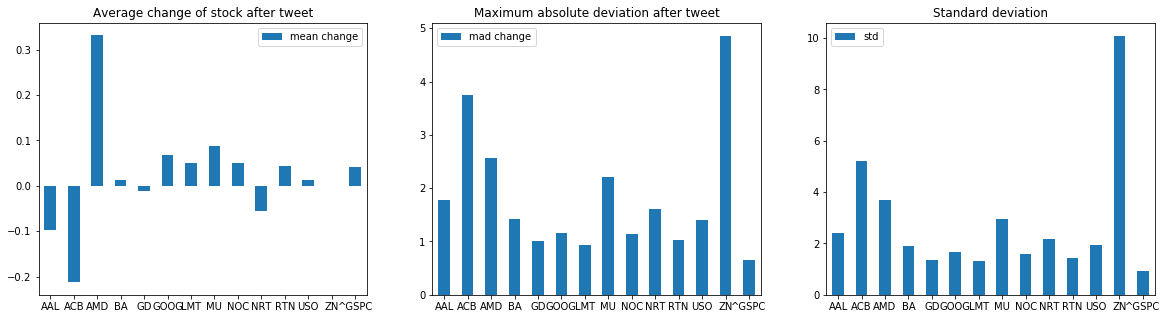

In [134]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

basicStockData.transpose().plot.bar(ax = axs[0], y = 'mean change', rot = 0, title = "Average change of stock after tweet")
basicStockData.transpose().plot.bar(ax = axs[1], y = 'mad change', rot = 0, title = "Maximum absolute deviation after tweet")
basicStockData.transpose().plot.bar(ax = axs[2], y = 'std', rot = 0, title = "Standard deviation")



plt.scatter(avgPerWord.iloc[:,0], effectsPerWord['AAL'])
plt.title("MAD values as a function of the words (indices).")


Text(0.5, 1.0, 'Average change values as a function of the words (indices).')

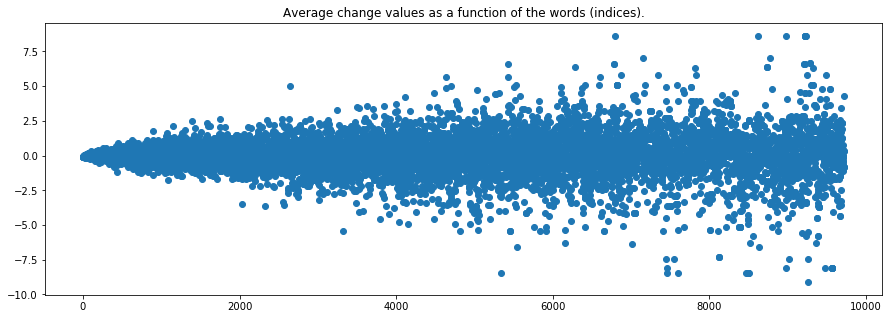

In [149]:

plt.scatter(avgPerWord.iloc[:,0], avgPerWord['AAL'])
plt.title("Average change values as a function of the words (indices).")


In [164]:
interestingWords = []

for i in range(0, avgPerWord.shape[0]):
    if(avgPerWord["AAL"][i] > 5 or avgPerWord["AAL"][i] < -5):
        print("Word: " + avgPerWord['Words'][i] + ", value change : " +  str(avgPerWord["AAL"][i]) + " %")



Word: starving, value change : -5.4427900000000005 %
Word: duchess, value change : 5.658530000000001 %
Word: spouses, value change : -5.4427900000000005 %
Word: vaping, value change : -5.38834 %
Word: therightmelissa, value change : -8.44175 %
Word: cornwall, value change : 5.658530000000001 %
Word: ï¿½maga, value change : 6.58683 %
Word: quicker, value change : -5.4427900000000005 %
Word: waivers, value change : -5.4427900000000005 %
Word: 325, value change : -5.4427900000000005 %
Word: girardeau, value change : 5.11801 %
Word: #iacp2018, value change : -6.54597 %
Word: filing, value change : -5.12541 %
Word: deceitful, value change : -5.4427900000000005 %
Word: 730, value change : -5.4427900000000005 %
Word: planï¿½, value change : -5.12541 %
Word: inept, value change : -6.30019 %
Word: (both, value change : -5.3358099999999995 %
Word: (corrupt), value change : 6.3987099999999995 %
Word: johnï¿½s, value change : 5.11801 %
Word: chriscuomo, value change : -5.12541 %
Word: subsidizing,